In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Pharma_Industry.csv')

In [3]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
df.shape

(500, 6)

In [5]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [6]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [20]:
independent_columns=['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)']

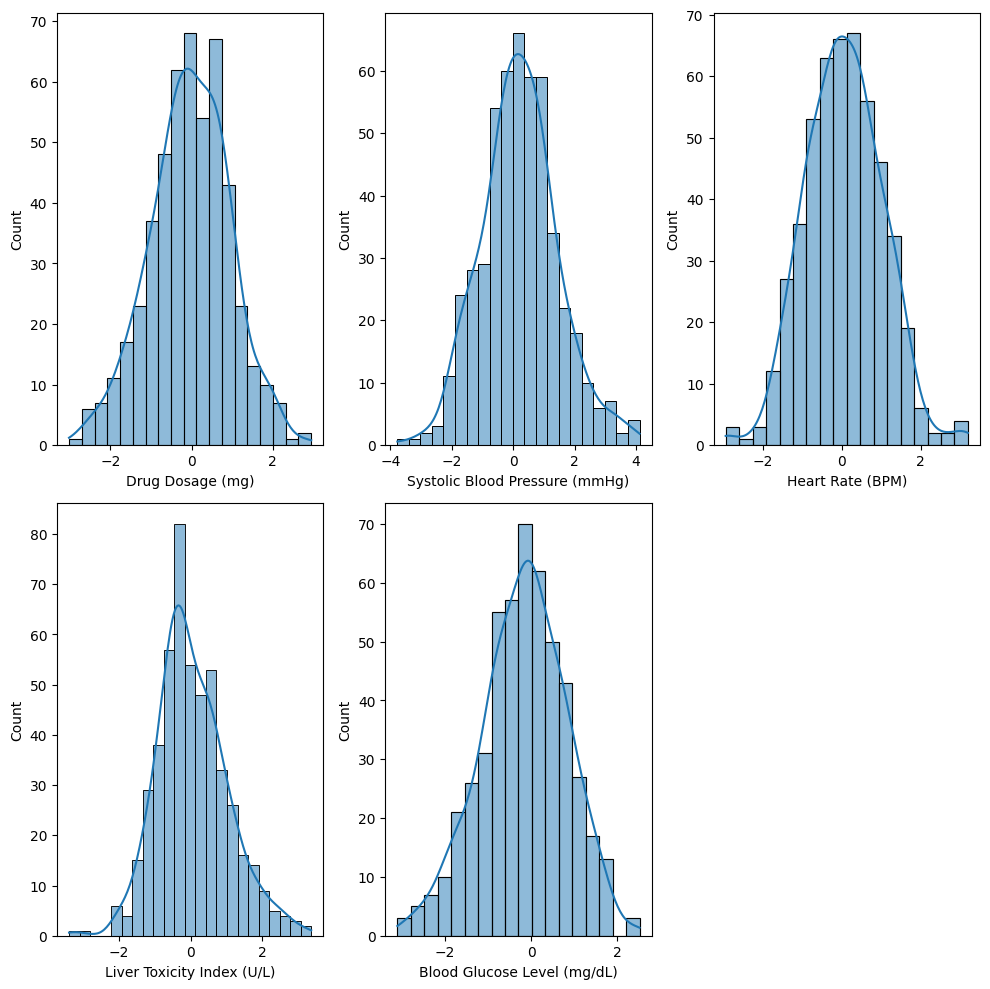

In [21]:
plt.figure(figsize=(10,10))
for i,col in enumerate(independent_columns,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True)
    
plt.tight_layout()
plt.show()

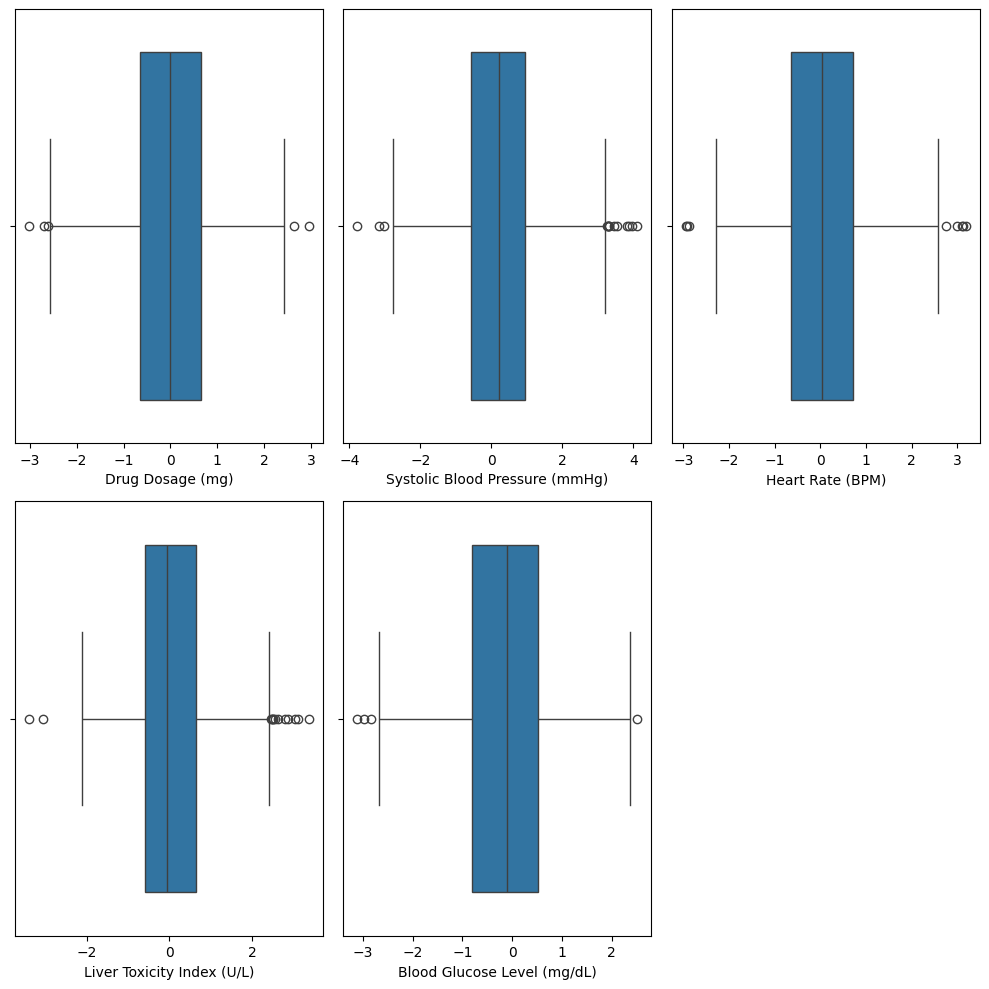

In [22]:
plt.figure(figsize=(10,10))
for i,col in enumerate(independent_columns,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    
plt.tight_layout()
plt.show()

In [24]:
df[independent_columns].describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863
std,0.979891,1.247567,0.971978,0.986001,0.983765
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106
75%,0.641151,0.951375,0.710774,0.633914,0.513555
max,2.949094,4.111751,3.193108,3.373269,2.518023


In [33]:
# Outliers Treatment
for col in independent_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    df=df[(df[col]>=lower_limit) & (df[col]<upper_limit)]

In [31]:
df.shape

(463, 6)

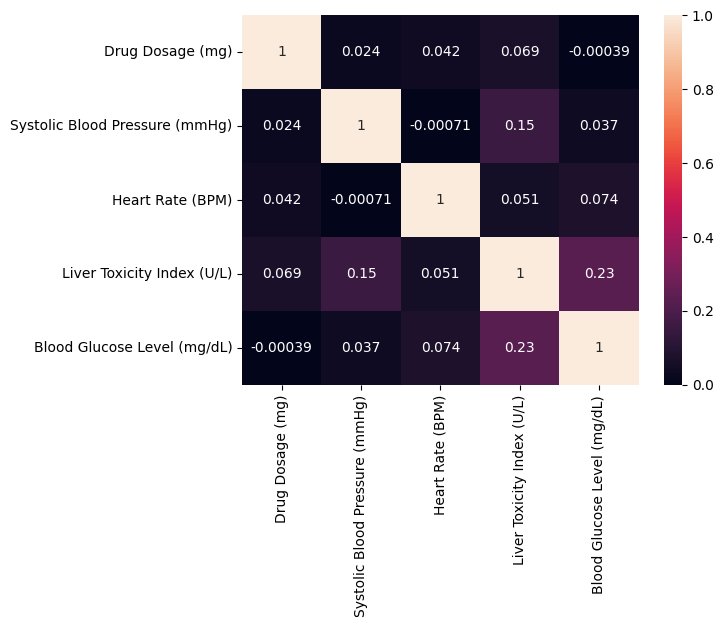

In [37]:
sns.heatmap(df[independent_columns].corr(),annot=True)
plt.show()

In [41]:
X=df.drop('Drug Response',axis=1)
y=df['Drug Response']

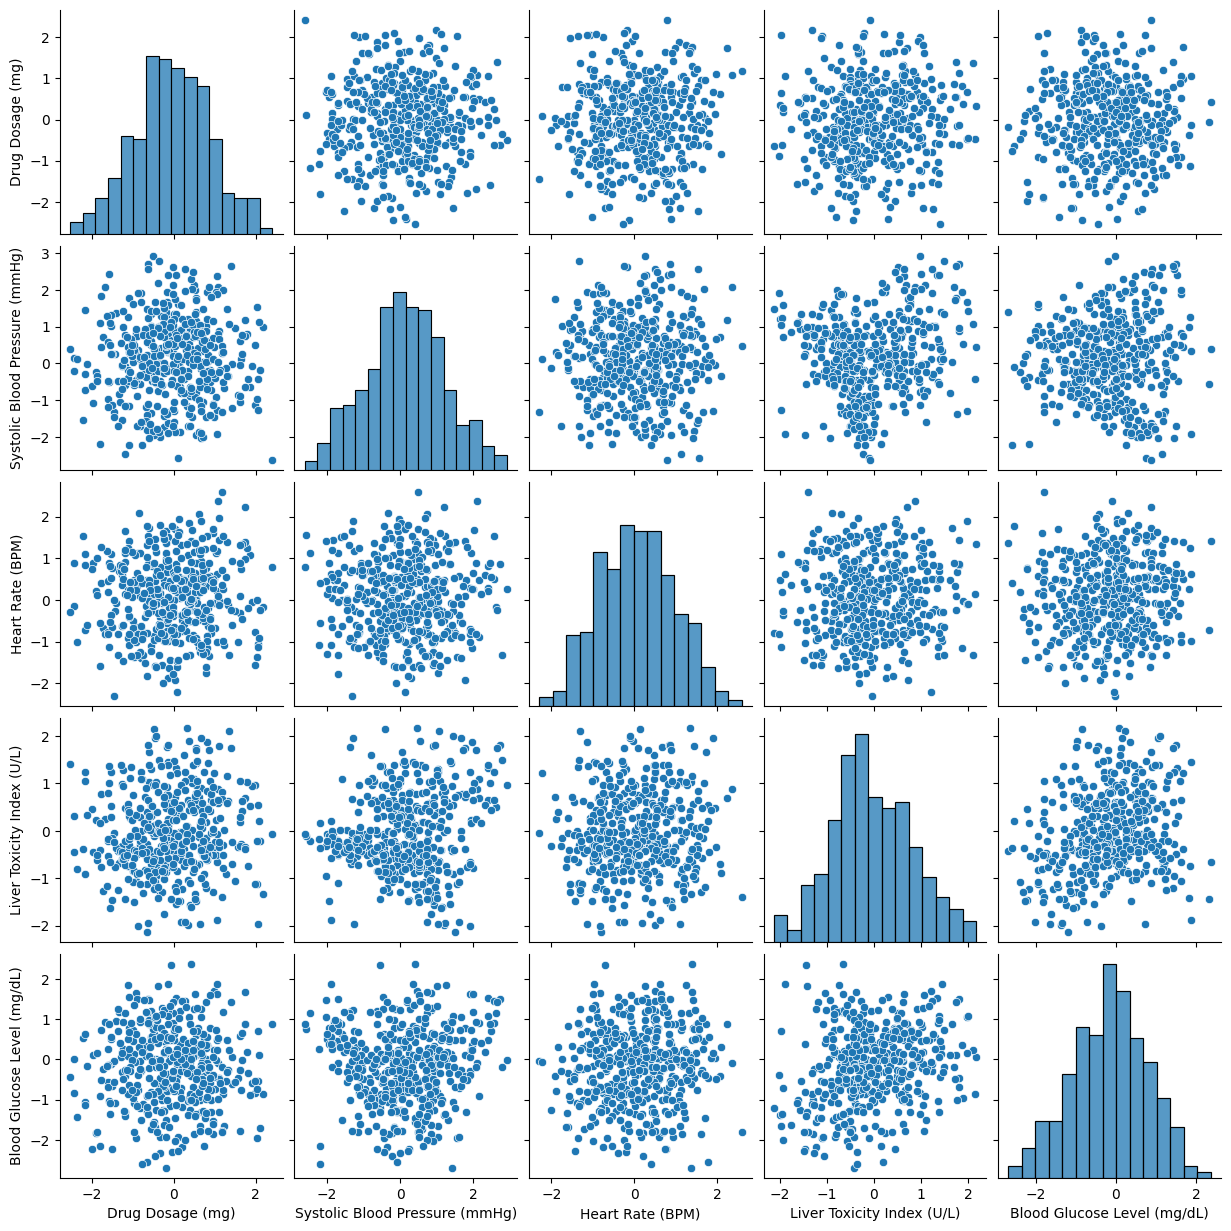

In [43]:
sns.pairplot(X)
plt.show()

In [45]:
y.value_counts()
# The class is balance

Drug Response
0    229
1    228
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
X_train.shape,X_test.shape

((365, 5), (92, 5))

In [49]:
from sklearn.svm import SVC

In [50]:
svc=SVC()

In [51]:
svc.fit(X_train,y_train)

SVC()

In [53]:
y_pred=svc.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
round(accuracy_score(y_test,y_pred),2)

0.77

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        52
           1       0.72      0.78      0.75        40

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92



In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
params={
    'C':[1.0,0.01,0.02,0.03,0.5,0.7,0.12],
    'kernel':['linear','sbf','poly'],
    'gamma':['scale','auto']
}

In [63]:
grid_search=GridSearchCV(svc,param_grid=params,cv=5,verbose=True)

In [70]:
import warnings
warnings.filterwarnings('ignore')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 0.01, 0.02, 0.03, 0.5, 0.7, 0.12],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sbf', 'poly']},
             verbose=True)

In [68]:
grid_search.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

In [69]:
grid_search.best_score_

0.7150684931506849